# Exploring Drivers of Telco Churn

by Mathias Boissevain 2022-03-14

### Project Goal


The goal of this project is to identify which customers may churn, the key drivers of that churn, and possible areas of focus for Telco to increase it's customer retention. 

### Project Description

In the competitive market of telecommunications retaining customers is paramount. The loss of customers can account for billions in revenue. Understanding why customers churn (terminate their contract) can help Telco get ahead of the situation and reach out to customers who have a high potential to churn. Understanding the drivers of churn can help Telco understand the areas in which they can make the biggest impact in persuading these customers to continue their contracts. In this project I will analyse some potential drivers of churn and create models to predict which customers did churn.

### Initial Question

1) Do those who churn pay a higher monthly charge?

2) Does the amount of extras i.e. streaming, tech support, device protection, etc.. affect churn?

3) Does Tenure affect churn?

4) Does having a partner or dependents affect churn?

### Data Dictionary

Variable | Meaning |
:-: | :-- |
Churn | Whether a customer continued subscription with the company
service_count | Count of services subscribed: online security, online backup, device protection, tech support, streaming tv, streaming movies
gender | Gender of customer
senior_citizen | Whether a customer is concidered a senior citizen
partner | Whether a customer has a partner or not
dependents | Whether a customer has dependents or not
tenure | How long a customer has been with the company
phone_service | Whether a customer is subscribed to a phone service
multiple_lines | Whether a customer is subscribed to multiple phon lines
online_security | Whether a customer is subscribed to online security
online_backup | Whether a customer is subscribed to online backup
device_protection | Whether a customer is subscribed to device protection
tech_support | Whether a customer is subscribed to tech support
streaming_tv | Whether a customer is subscribed to streaming TV
streaming_movies | Whether a customer is subscribed to streaming Movies
paperless_billing | Whether a customer has paperless billing
monthly_charges | What the customer pays monthly
total_charges | The total a customer has paid over thier individual tenure
contract_type | What type of contract the customer has: One year, Two years, or month to month
payment_type | How the customer pays their bill: Bank transfer, Credit Card, Electronic Transfer, or Mail Check
internet_service_type | What type of internet service a customer has: Fiber optic, DSL, None

### Wrangle Telco Data

From the codeup mySQL server I pulled all columns from the telco_churn dataset using the following query:

`SELECT *
    
    FROM customers
    
    JOIN contract_types
    
    USING(contract_type_id)
    
    JOIN payment_types
    
    USING(payment_type_id)
    
    JOIN internet_service_types
    
    USING(internet_service_type_id)`

In [124]:
# Import the correct function from the acquire module
from acquire import get_telco_data

# Import warning to stop unneeded warning messages
import warnings
warnings.filterwarnings('ignore')

# Retrieve the proper data from the database to create a dataframe needed for analysis
telco = get_telco_data()

Using cached csv file...


I cleaned the telco data in the following steps:

1) Drop duplicate columns ('internet_service_type_id', 'payment_type_id', 'contract_type_id')    
    
2) Drop missing values in total_charges (11 in total) and convert total_charges to the correct data type of float
    
4) Convert the following categorical data that is binary in nature ('Yes' or 'No') to numeric binary characters and set to type int
    
    ('gender','partner','dependents','phone_service','paperless_billing','churn')
    
4) Create dummy variables for the following categorical variables:
   
   ('multiple_lines','online_security','online_backup','device_protection',
   'tech_support','streaming_tv','streaming_movies','contract_type',
   'payment_type','internet_service_type')
    
5) Combine dummy and original dataframes to include all variables
    
6) Rename columns that have space

7) Create a variable that gives a count of extra services for each customer

    ('online_security_Yes', 'online_backup_Yes',
    'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes')

In [125]:
# Import pandas for data manipulation and the prepare module
import pandas as pd
from prepare import clean_split_telco

# Run the telco data and target variable into the clean_split function
train, validate, test = clean_split_telco(telco, 'churn')

Our data is split into 3 samples:
- The train sample represents 56 % of the data and is used to train the model
- The validate sample represents 24 % of the data and is used to test for overfitting
- The test sample reresents 20 % of the data and is used to test our top model
- All splits were done with a seed of 123 and churn used as the stratify variable to ensure a balanced ratio in samples

### Data Context

- Total customers: 7043

- Customers who churn: 1869 or 26.5 %

- Mean Monthly Charges(dollars): Churn: 74.44 / No Churn: 61.27

- Mean Tenure(Months): Churn 17.979 / No Churn 37.569 


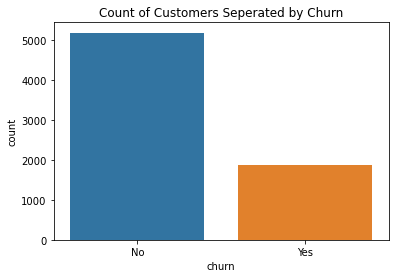

In [126]:
# Import seaborn and matplotlib for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Chart showing count of churn
sns.countplot(data=telco,x='churn')
plt.title('Count of Customers Seperated by Churn')
plt.show()

### Exploritory Analysis: Who churned?

Questions Answered
1. Do those who churn pay a higher monthly charge?
2. Does the service count a customer has affect churn?
3. Does Tenure affect churn?
4. Does having a partner or dependents affect churn?

## Question 1

Question: Do those who churn pay a higher monthly charge?

### Plot

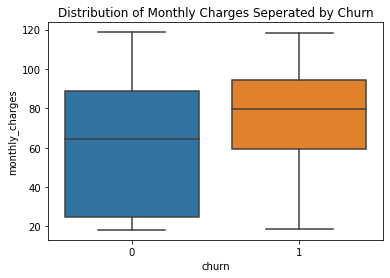

In [127]:
sns.boxplot('churn', 'monthly_charges', data = train)
plt.title('Distribution of Monthly Charges Seperated by Churn')
plt.show()

### Statistical Test 

$H_0$: Those who churn pay the same average monthly charges as the whole population. 

$H_α$ Those who churn pay a higher average monthly charge than the whole population.

- A one sample T-test was performed, it returned a near zero p-value. 

- Null hypothesis was rejected. So we accept the alternative hypothesis.

The plot showing the distribution of monthly charges seperated by churn shows that those who do churn do show a higher monthly average.

## Question 2

Question: Does the service count a customer has affect churn?

### Plot

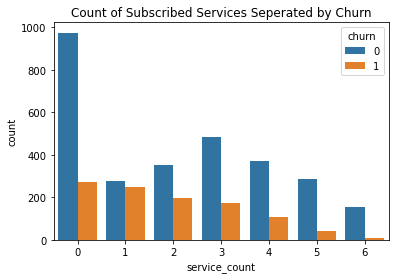

In [128]:
sns.countplot('service_count' , data = train, hue = 'churn')
plt.title('Count of Subscribed Services Seperated by Churn')
plt.show()

### Statistical Test

$H_0$: Those who churn had the same amount or less subscriptions then those that did not.

$H_α$: Those who churn had more subscriptions than those that did not. 

- A Mann-Whitney U test was performed, it returned a p value of 0.6646.

- We accept the null hypothesis.

The count plot shows that those who churn tend to have a lower subscriptions count than those who do not. With the highest churn rate being at 1 subscriptions.

## Question 3

Question: Does Tenure affect churn?


### Plot

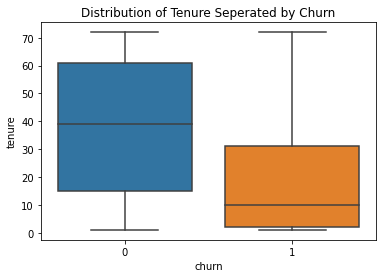

In [129]:
sns.boxplot('churn', 'tenure', data = train)
plt.title('Distribution of Tenure Seperated by Churn')
plt.show()

The above distribution shows a significantly lower average tenure for those who churn.

## Question 4

Question: Does having a partner or dependents affect churn?

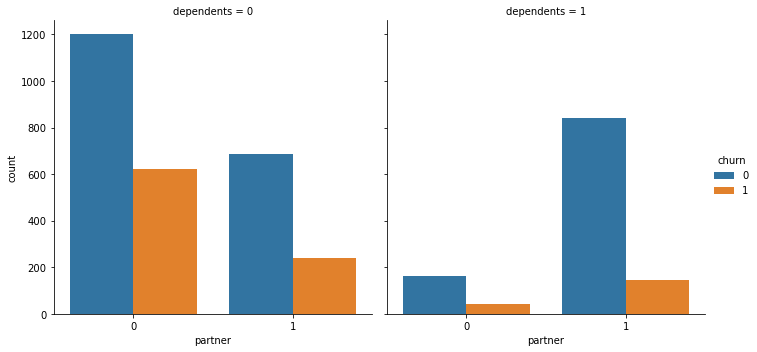

In [130]:
sns.catplot(x='partner', col = 'dependents', hue='churn', kind = 'count', data=train)
plt.show()

### Statistical Test

$H_0$: Churn is independent of having a partner or dependents.

$H_α$: There is a relationship between churn and having a partner or dependents. 

- Two seperate chi squared contingency tests were ran comparing partner and dependent seperatey to the overall population churn.

- Both returned low enough p values to reject the null hypothesis. 

According to the Chi Squared test there is a relationship between churn and having a partner or dependents. According to the plot above those with partners and dependents seem to churn at a low rate.

### Summary: Who did Churn?

Post exploration tenure seemed have the most potential for indicating churn. Over 75 % of those who churn had a lower tenure than the mean of those who did not. While those that churn showed a higher average monthly charge they also had a lower subscription count. This could warrent further investigation. Lastely having a partner or dependents seemed to be an indicator of no churn. 

# Model

In [131]:
# Import function to split data for modeling as well as sklearn for model reporting
from prepare import model_split_telco
from sklearn.metrics import classification_report
from sklearn import metrics

### Evaluation Metric

When evaluating the models I beleive its important to understand when our model predicts both churn and no churn (model accuracy). This is important when ensuring we are reaching out to the correct individauls when offering discounts or promotions.

### Basline

In [132]:
# Shows the counts of churn: 0 meaning no churn and 1 meaning churn
# No churn is our baseline because of it's higher frequency in the data.
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [133]:
# Setting a baseline of No Churn or 0

# We use the DummyClassifier from sklearn to create a baseline accuracy.
from sklearn.dummy import DummyClassifier 

# model_split_telco splits our data into x: Features used for prediction and y: the target variable we are attempting to predict
x_train_dum, y_train_dum = model_split_telco(train)

# Here we create and fit the model
dummy = DummyClassifier(strategy='most_frequent', random_state = 123, constant = None)
dummy.fit(x_train_dum, y_train_dum)   

# Here we create our predictions
y_pred_dum = dummy.predict(x_train_dum)

# Check report for current baseline accuracy: 0.73
print(classification_report(y_train_dum, y_pred_dum))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2891
           1       0.00      0.00      0.00      1046

    accuracy                           0.73      3937
   macro avg       0.37      0.50      0.42      3937
weighted avg       0.54      0.73      0.62      3937



### Train

The top models I tested were KNN, Logistic Regression and a Decision Tree. KNN neighbors showed the most promise with an accuracy of 0.83. Both the Logistic Regression and Decision Tree models showed 0.8 in test.

In [134]:
# Import the sklearn knn classifier
from sklearn.neighbors import KNeighborsClassifier

# split the data
x_train_knn, y_train_knn, = model_split_telco(train)

# Create the model
knn = KNeighborsClassifier()

# Fit the model to training set
knn.fit(x_train_knn, y_train_knn)

# Predict on training set
y_pred_knn = knn.predict(x_train_knn)

# Print the report
print(classification_report(y_train_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2891
           1       0.73      0.59      0.65      1046

    accuracy                           0.83      3937
   macro avg       0.80      0.76      0.77      3937
weighted avg       0.83      0.83      0.83      3937



In [135]:
# Import sklearn logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Split the data
x_train_lr, y_train_lr = model_split_telco(train)

# Create the model
logit = LogisticRegression(C=10, random_state=123)

# Fit the model to training set
logit.fit(x_train_lr, y_train_lr)

# Predict on training set
y_pred_lr = logit.predict(x_train_lr)

# Print the report
print(classification_report(y_train_lr, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2891
           1       0.65      0.54      0.59      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.72      0.73      3937
weighted avg       0.79      0.80      0.79      3937



In [136]:
# Import the sklearn Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Split the data
x_train_dt, y_train_dt = model_split_telco(train)

# Create the model
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model to training set
clf = clf.fit(x_train_dt, y_train_dt)

# Predict on trianing set
y_pred_dt = clf.predict(x_train_dt)

# Print the report
print(classification_report(y_train_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.40      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.79      0.80      0.78      3937



### Validate

Both the KNN and Decision Tree models produced an accuracy above baseline but were both lower than the training data. The logistic regression model had the highest accuracy with a consistent 0.80 so it will be used in testing.

In [137]:
# Split validate data
x_validate_knn, y_validate_knn = model_split_telco(validate)

# Predict on validate data
y_pred_val_knn = knn.predict(x_validate_knn)

# Print report
print(classification_report(y_validate_knn, y_pred_val_knn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1239
           1       0.56      0.46      0.51       449

    accuracy                           0.76      1688
   macro avg       0.69      0.67      0.68      1688
weighted avg       0.75      0.76      0.75      1688



In [138]:
# Split on validate data
x_validate_lr, y_validate_lr = model_split_telco(validate)

# Predict on validate data
y_pred_val_lr = logit.predict(x_validate_lr)

# Print report
print(classification_report(y_validate_lr, y_pred_val_lr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1239
           1       0.64      0.55      0.59       449

    accuracy                           0.80      1688
   macro avg       0.74      0.72      0.73      1688
weighted avg       0.79      0.80      0.79      1688



In [139]:
# Split on validate data
x_validate_dt, y_validate_dt = model_split_telco(validate)

# Predict on validate data
y_pred_val_dt = clf.predict(x_validate_dt)

# Print report
print(classification_report(y_validate_dt, y_pred_val_dt))

              precision    recall  f1-score   support

           0       0.80      0.91      0.86      1239
           1       0.62      0.39      0.48       449

    accuracy                           0.77      1688
   macro avg       0.71      0.65      0.67      1688
weighted avg       0.75      0.77      0.75      1688



### Test

The Logistic Regression Model performed consistantly above 80% which is 7% above baseline. 

In [140]:
# Split test data
x_test_lr, y_test_lr = model_split_telco(test)

# Predict on test data
y_pred_test_lr = logit.predict(x_test_lr)

# Predict probability  on test data
y_proba_test_lr = logit.predict_proba(x_test_lr)

# Print report
print(classification_report(y_test_lr, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1033
           1       0.66      0.59      0.62       374

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407



In [141]:
# Import numpy
import numpy as np

# Check for top five features
coefs = logit.coef_[0]
top_five = np.argpartition(coefs, -5)[-5:]
print(list(x_test_lr.columns[top_five]))

['payment_type_Electronic_check', 'senior_citizen', 'paperless_billing', 'contract_type_Month-to-month', 'internet_service_type_Fiber_optic']


# Conclusion

## Summary

Through exploration tenure seemed to have the most potential for being a driver or churn. 

While those who churned tended to pay higher monthly averages they also tended not to be subscribed to as many additional services as those who did not churn.

Those who had partners and dependents had a much lower churn rate then those who did not.

The test data for the logistic model showed different features as the top drivers of the model. This warrents further exploration.

## Recommendations

Since those who churn seem to have low tenure, Telco may consider offering a discount to those who are just starting out with the company.

## Next Steps

Given additional time, further analysis in both modeling and exploring statistical relationships between current features could prove beneficial in maximizing predictions as well as help understand areas of consideration for potential discounts and thier impacts on churn.

## Exporting CSV Predictions

In [150]:
# Create dataframe
pred = pd.DataFrame(columns=['Customer_id', 'Probability_of_churn', 'Prediction_of_churn'])

# Assign id
pred['Customer_id'] = test.customer_id

# Assign probability
pred['Probability_of_churn'] = y_proba_test_lr

# Assign prediction
pred['Prediction_of_churn'] = y_pred_test_lr

# Reset index
pred = pred.reset_index(drop=True)

# output to csv
pred.to_csv('predictions.csv',index=False)

In [151]:
prediction = pd.read_csv('predictions.csv')
prediction.head()

,Customer_id,Probability_of_churn,Prediction_of_churn
0,4716-MRVEN,0.971433,0
1,8966-KZXXA,0.974069,0
2,8720-RQSBJ,0.472818,1
3,7504-UWHNB,0.571716,0
4,1730-VFMWO,0.915904,0
